# Least square estimates

## Fitting a simple, linear model on data

Position of the problem. 

We have 
* experimental data: $(x_i, y_i, \sigma_i)$
* a model: $f(x,\vec{\theta})$ which is supposed to describe the data, and depends on unknown parameters $\vec{\theta}$.

We want to find the function that describes best the data. The least square prescription is to minimize the sum of the squares of the residuals, weighted by the measurement uncertainties: 
$$
\chi^2 = \sum_i  w_i \left(y_i - f(x_i, \vec{\theta})\right)^2
$$
with $w_i = \frac{1}{\sigma_i^2}$ So, to find the best fit, in the sense of least squares, one needs to find the value of $\vec{\theta}$ that minimizes the $\chi^2$ defined above. 


## Linear models
If the model $f$ is a linear function of the $\vec{\theta}$ parameters, then, this minimization is actually very simple, and may be performed in one single step. By linear function of the parameters, we mean that $f$ may be written as:
$$
f(x,\vec{\theta}) = \sum_k \theta_k g_k(x)
$$
(example: a polynomial, a trigonometric series, ...)

In that case, the $\chi^2$ may be written as:
$$
\chi^2 = \sum_i w_i \left(y_i - \sum_k \theta_k g_k(x)\right)^2
$$
at the minimum of $\chi^2$, we have $\nabla\chi^2 = \vec{0}$, or 
$$
\forall p\ \ \ \frac{1}{2}\frac{\partial\chi^2}{\partial\theta_p} = \sum_i w_i\left(y_i - \sum_k \theta_k g_k(x_i)\right) \left(-g_p(x_i)\right) = 0
$$
We can show that it boils down to solving the linear equation:
$$
\mathbf{A} \vec{\theta} = \mathbf{B}
$$
where 
$$
A_{pq} = \sum_i w_i g_p(x_i) g_l(x_j)\ \ \ B_p = \sum_i w_i y_i g_p(x_i)
$$
So, to find the best fit function, all we have to do is to form the $A$ and $B$ matrices, and to solve the system. This is generally easy and fast. 

## Non-linear models
Example: $f(x; m,\sigma) = \exp -\frac{1}{2} \left(\frac{x-m}{\sigma}\right)^2$, $f(x) = \cos \omega x$... 

The situation is more complicated, as the $\chi^2$ is no longer a quadratic function of the parameters. In that case, we use iterative methods. The fastest ones are those where we can rely on an estimate of the second derivatives of the $\chi^2$. A common approach is to (1) pick a starting point (hopefully not too far from the minimum (2) linearize the model around that starting point (3) minimize the quadratic $\chi^2$ that results from the model linearization (4) move to the minimum and iterate. 

## A practical example
### generating data

In [140]:
import numpy as np
import pylab as pl
import scipy.stats as stats 

%matplotlib inline
pl.rcParams['figure.figsize'] = (8.0, 6.0)
pl.rcParams['font.size'] = 18

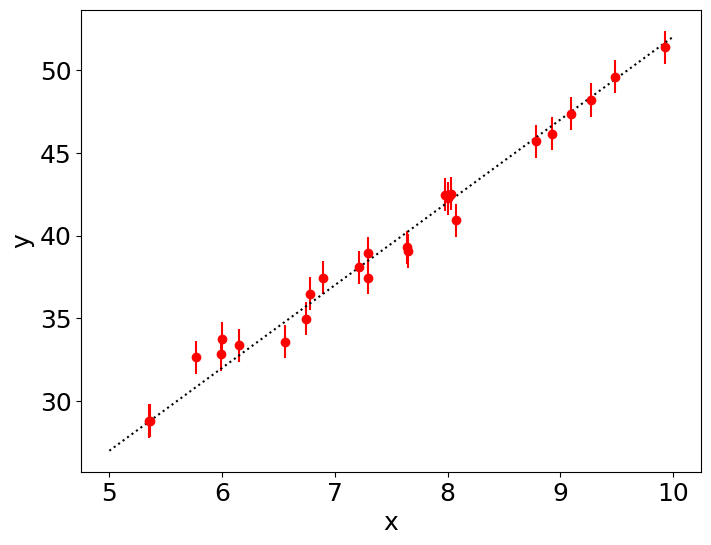

In [154]:
# let's create some data 
# it corresponds to a series of measurements of some linear law
N = 25
xmin, xmax = 5., 10.
a_true, b_true = 5., 2.
X = np.random.uniform(xmin, xmax, N)
xx = np.linspace(xmin, xmax, 100)

def model(x, a=a_true, b=b_true):
    return a * x + b

def gen():
    # we use the same design for all experiments
    x = X
    ey = np.random.uniform(1., 1., size=N)
    y = model(x) + np.random.normal(scale=ey, size=N)
    return x, y, ey

x, y, ey = gen()

_ = pl.errorbar(x, y, yerr=ey, color='r', ls='', marker='o')
_ = pl.xlabel('x')
_ = pl.ylabel('y')
_ = pl.plot(xx, model(xx), 'k:')

In [155]:
# here, we use what we have learnt above
# to show that linear fits boil down to a linear algebra problem
import numpy.linalg as linalg

J = np.array([x, np.ones(len(x))]).T
W = np.diag(1. / ey**2)
A = np.dot(J.T, W).dot(J)
B = np.dot(J.T, W).dot(y)
print(J.shape, A.shape, B.shape, type(W))
p = linalg.solve(A, B)

C = np.linalg.inv(A)
print(p)
print(C)

(25, 2) (2, 2) (2,) <class 'numpy.ndarray'>
[4.76904094 3.75020549]
[[ 0.02419571 -0.1802784 ]
 [-0.1802784   1.38322556]]


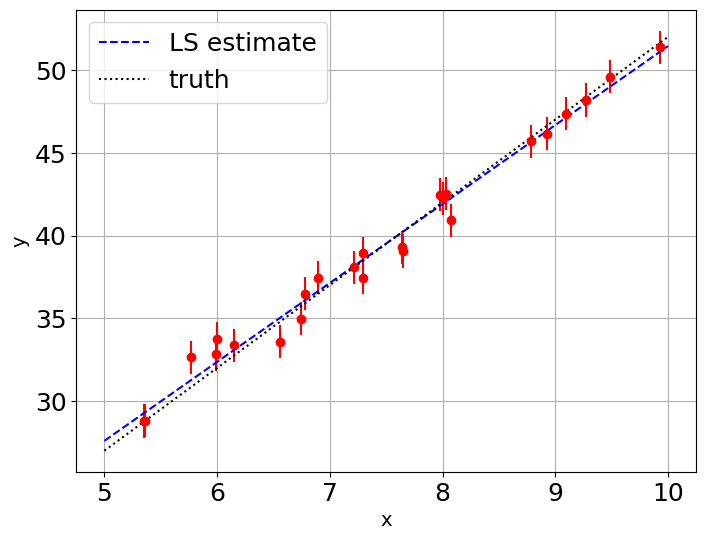

In [156]:
pl.errorbar(x, y, yerr=ey, ls='', color='r', marker='o')
pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)

pl.plot(xx, model(xx, a=p[0], b=p[1]), color='blue', ls='--', label='LS estimate')
pl.plot(xx, model(xx, a=a_true, b=b_true), color='k', ls=':', label='truth')
pl.legend(loc='best')
pl.grid(1)

## Estimator properties

To examine the estimator properties, let's do a Monte-Carlo study

In [157]:
NMC = 5000
pp = []
for i in range(NMC):
    x, y, ey = gen()
    p = np.polyfit(x,y,w=1/ey, deg=1)
    pp.append(p)
p = np.array(pp)

Text(0, 0.5, '$\\beta$')

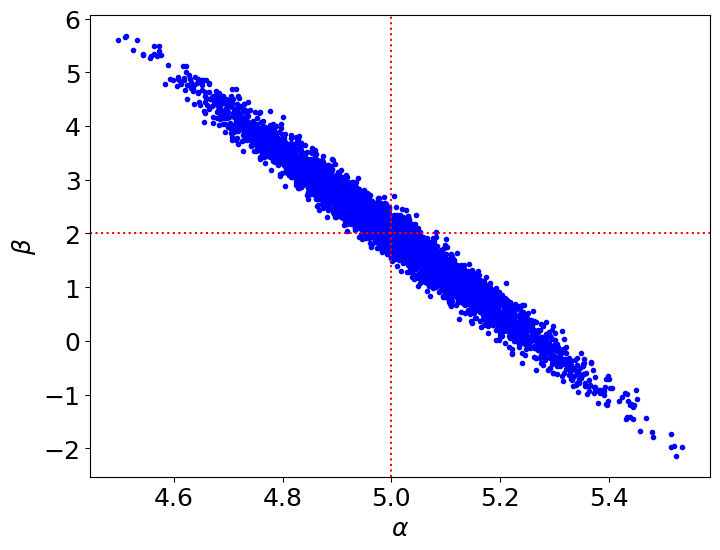

In [158]:
pl.plot(p[:,0], p[:,1], 'b.')
pl.axvline(a_true, color='r', ls=':')
pl.axhline(b_true, color='r', ls=':')
pl.xlabel('$\\alpha$')
pl.ylabel('$\\beta$')
# r = 2*C[0,1] / np.sqrt(C[0,0] * C[1,1])
# u = np.linspace(3, 7, 100)
# pl.plot(u, b_true+r*(u-a_true), 'k--')

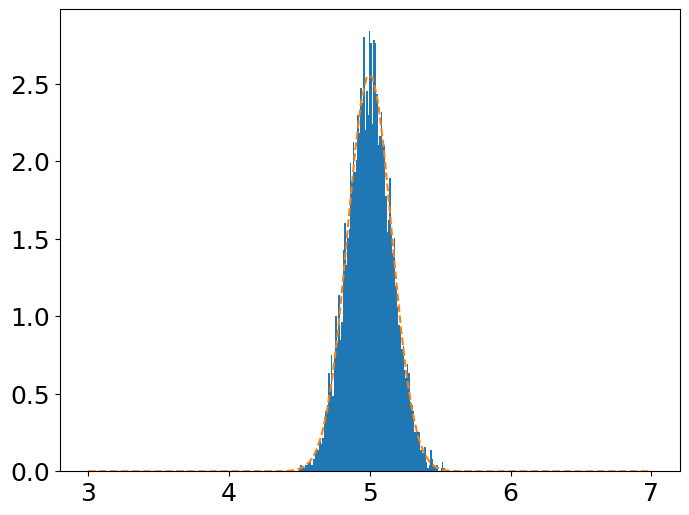

In [159]:
import scipy
_ = pl.hist(p[:,0], bins=100, density=True)
xxx = np.linspace(3, 7, 100)
_ = pl.plot(xxx, scipy.stats.norm.pdf(xxx, loc=a_true, scale=np.sqrt(C[0,0])), ls='--')

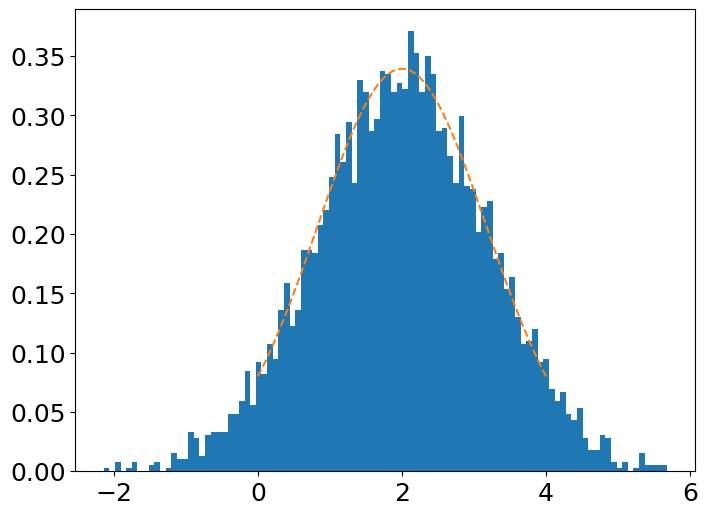

In [160]:
_ = pl.hist(p[:,1], bins=100, density=True)
xxx = np.linspace(0,4,100)
_ = pl.plot(xxx, scipy.stats.norm.pdf(xxx, loc=b_true, scale=np.sqrt(C[1,1])), ls='--')

# Now, what happens if we change the experiment design ? 

 - degrade / improve the uncertainties ? 
 - change the number of points ? 
 - change the barycenter of the x's ? 

# Another way to do the same fit

In [135]:
import scipy.optimize as optimize

# the model
def f(p, x):
    return p[0] * x + p[1]

# the function that computes the weighted residuals
def errfunc(p,x, y, err):
    return (f(p,x) - y) / err

# an initial state
p0 = np.zeros(2)
p0[0], p0[1] = 0.1, 0.1

# minimize
p, success = optimize.leastsq(errfunc, p0, args=(x,y,ey))
print(p, success)

[5.00586626 2.11276454] 1


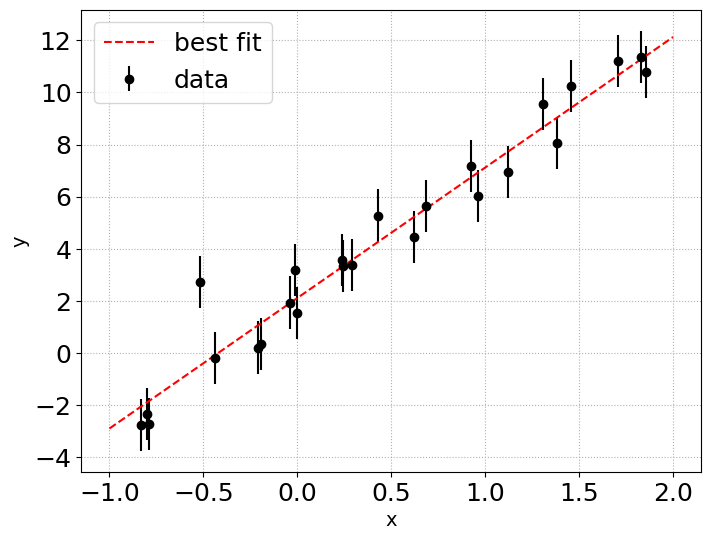

In [136]:
pl.errorbar(x, y, yerr=ey, ls='', marker='o', color='k', label='data')
pl.plot(xx, np.polyval(p, xx), 'r--', label='best fit')

pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)
pl.legend(loc='upper left')
pl.grid(1, ls=':')

## Non linear fits

Let's define a family of functions:
$$
f(x; a, b, \omega) = a \cos(\omega x) + b \sin(1.72 \omega x)
$$

We first assume that $\omega$ is known; $\omega = 1.23$ (not fitted)
* generate noisy data with some value of parameters $a$ and $b$
* represent plot that data in a nice way
* fit the model above and retrieve the values of a and b

We then assume that $\omega$ is not know (we know it is around one)
* same as last question, but this time, we fit for $\omega$ (use optimize.leastsq)

<ErrorbarContainer object of 3 artists>

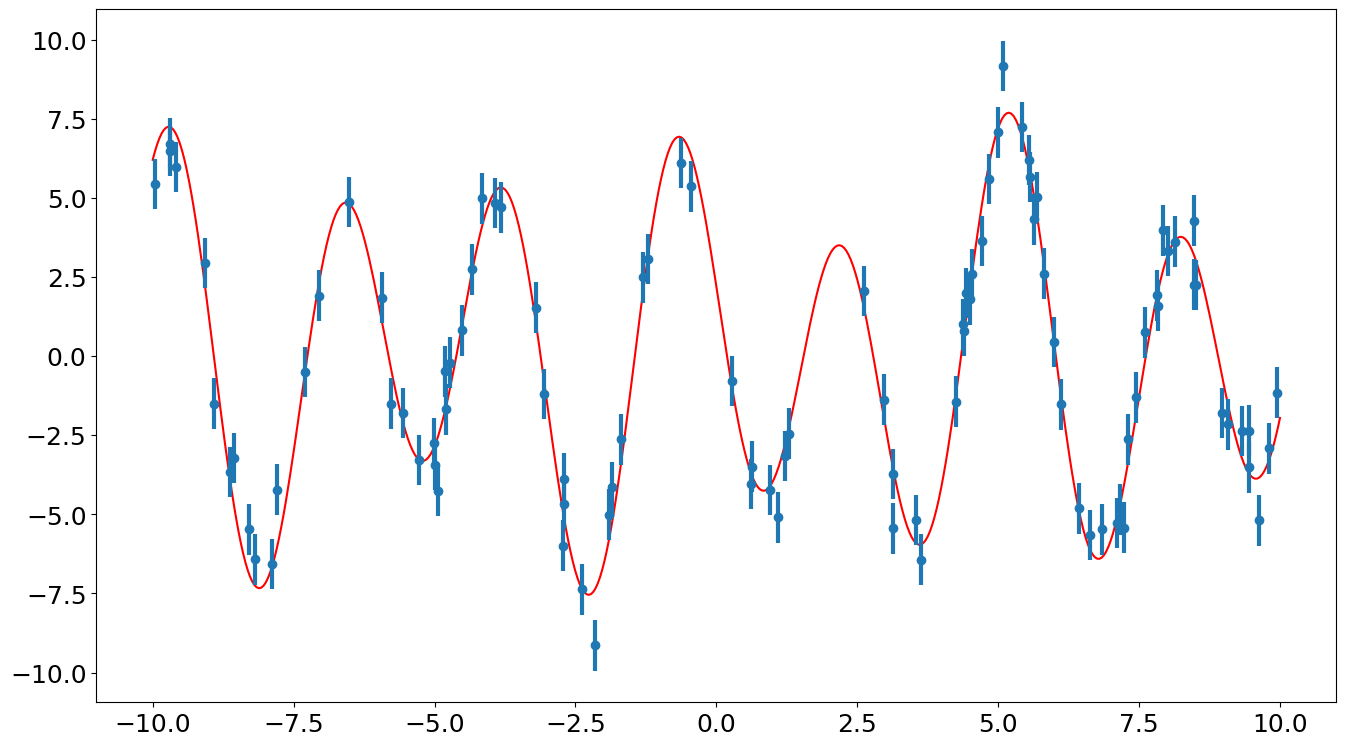

In [161]:
def wave(x, a, b, omega):
    return a * np.cos(omega*x) + b * np.sin(1.72*omega*x)

a, b, omega = 2.2, -5.5, 1.23

pl.figure(figsize=(16,9))
x = np.linspace(-10.,10.,500)
pl.plot(x, wave(x,a,b,omega), 'r-')

x = np.random.uniform(-10., 10, 100)
y = wave(x,a,b,omega)
yerr=np.ones(len(x)) * 0.8
n = np.random.normal(scale=yerr, size=100)
y += n
pl.errorbar(x,y,yerr=yerr, marker='o',ls='', lw=3)

In [162]:
from scipy import optimize

def errfunc(p, x, y, err):
    return (y - wave(x, p[0], p[1], 1.23)) / err
    
p0 = [0.1, 0.1]
p, success = optimize.leastsq(errfunc, p0, args=(x, y, yerr))
print(p, success)

[ 2.03671518 -5.34865024] 1


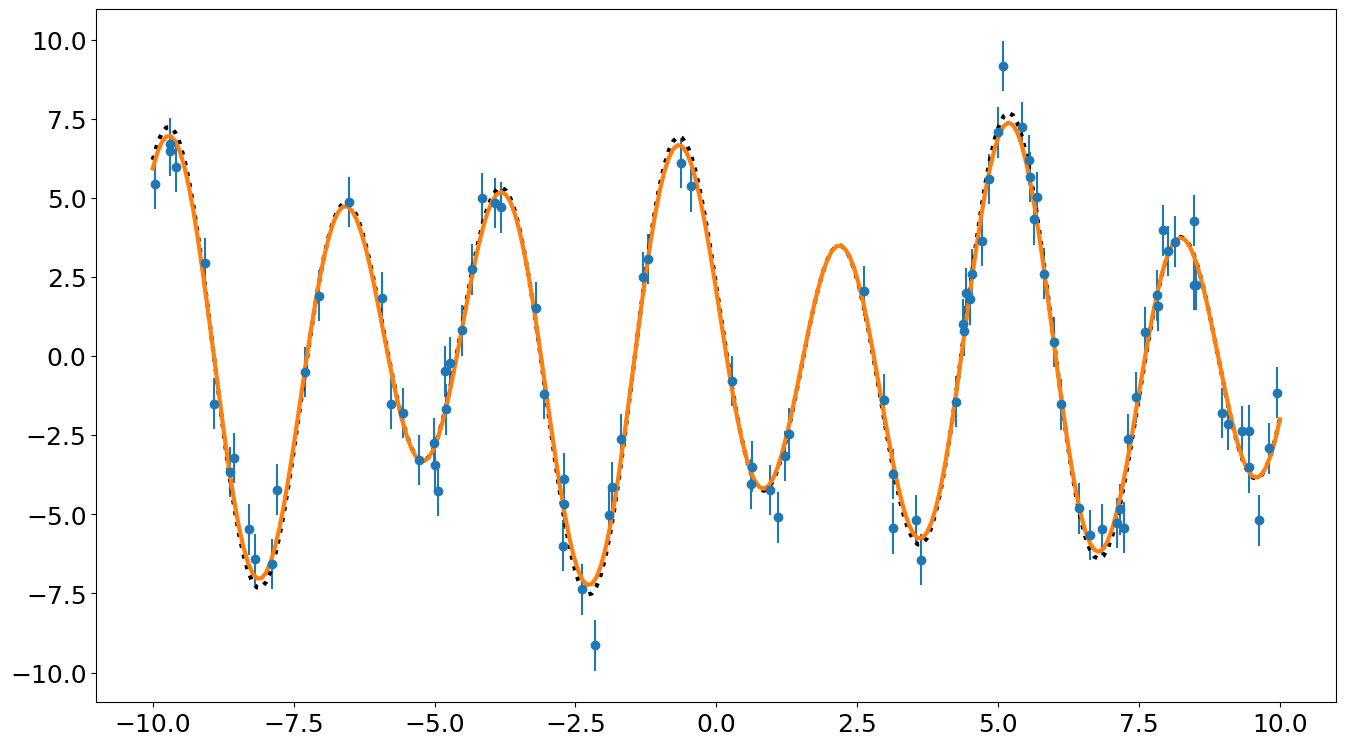

In [163]:
pl.figure(figsize=(16,9))
pl.errorbar(x,y,yerr=yerr, marker='o',ls='')
xx = np.linspace(-10, 10., 250)
pl.plot(xx, wave(xx, a=2.2, b=-5.5, omega=1.23), ls=':', color='k', lw=3)
pl.plot(xx, wave(xx, a=p[0], b=p[1], omega=1.23), lw=3)